In [1]:
import importlib
import sys
sys.path.append('../kl_tools/')
print(sys.path)
import kltools_grism_module as m
importlib.reload(m)
print(m.__version__)
print(m.__file__)
import time
import numpy as np
from astropy.units import Unit
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d.axes3d import get_test_data
import galsim as gs
import galsim.roman as roman
from galsim.angle import Angle, radians
import pickle
import basis
import cube
import intensity
import likelihood
import mcmc
import parameters
from parameters import Pars
import priors
import utils
import velocity
from DataSimulator import DataSimulator
from likelihood import LogLikelihood_Roman, LogPosterior_Roman
import getdist
from getdist import plots, MCSamples
# new modules
from spectrum import Spectrum
#from MockObs import Mock

['/home/jiachuan/kl-tools/notebooks', '/home/jiachuan/anaconda3/envs/kltools/lib/python39.zip', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/lib-dynload', '', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/GalSim-2.3.4-py3.9-linux-x86_64.egg', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/kltools_grism_module-0.0.2-py3.9-linux-x86_64.egg', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/IPython/extensions', '/home/jiachuan/.ipython', '../kl_tools/']
0.0.2
/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/kltools_grism_module-0.0.2-py3.9-linux-x86_64.egg/kltools_grism_module.cpython-39-x86_64-linux-gnu.so


In [2]:
USE_REAL_BANDPASS = True

# Checking dispersion using kltools pipeline

In [3]:
params_file = "/home/jiachuan/kl-tools/yaml/params_HST.yaml"
pars = Pars(yaml_file=params_file)
logprob = LogPosterior_Roman(pars, fid_pars=pars.dynamic_fid)
ds = logprob.log_likelihood.dsim
#ds.evaluateTheoryModel(pars.dynamic_fid)
#for i in range(ds._data.shape[0]):
#    if i!=500:
#        ds._data[i] = np.zeros([ds._data.shape[1], ds._data.shape[2]])
#img1, noise1 = ds.data_generators[0].stack(ds._data, ds.lambdas, force_noise_free=False)

Reading parameter settings from YAML file (<class '_io.TextIOWrapper'>)
{'dynamic_pars': {'g1': {'fid': 0.0, 'min': -1.0, 'max': 1.0, 'order': 1}, 'g2': {'fid': 0.0, 'min': -1.0, 'max': 1.0, 'order': 2}, 'theta_int': {'fid': -1.04, 'min': -1.5708, 'max': 1.5708, 'order': 3}, 'sini': {'fid': 0.86, 'min': 0.0, 'max': 1.0, 'order': 4}, 'v0': {'fid': 0.0, 'mean': 0.0, 'std': 100.0, 'clip_sigmas': 10.0, 'order': 5}, 'vcirc': {'fid': 300.0, 'mean': 300.0, 'std': 35.0, 'clip_sigmas': 5.0, 'order': 6}, 'rscale': {'fid': 0.5, 'min': 0.0, 'max': 2.0, 'order': 7}}, 'model_dimension': {'Nx': 200, 'Ny': 200, 'scale': 0.016, 'lambda_range': [1236.6, 1325.1], 'lambda_res': 0.05, 'lambda_unit': 'nm'}, 'intensity': {'type': 'inclined_exp', 'hlr': 0.5}, 'velocity': {'model_name': 'default', 'v_unit': 'km / s', 'r_unit': 'arcsec'}, 'sed': {'template': '../data/Simulation/GSB2.spec', 'wave_type': 'Ang', 'flux_type': 'flambda', 'z': 0.9513, 'wave_range': [500.0, 3000.0], 'obs_cont_norm': [614, 2.6e-17], 'l

In [ ]:
print("Evaluating simulated data using python GalSim routines")
%time data_fid, covs_fid = ds.evaluateSimulatedData(pars.dynamic_fid, force_noise_free = False, use_grism_cpp = False)
print("Evaluating simulated data using C++ routines")
%time data_fast, covs_fast = ds.evaluateSimulatedData(pars.dynamic_fid, force_noise_free = False)

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

axes[0,0].imshow(data_fid[0], origin='lower', cmap='binary')
axes[0,0].set_title("GalSim Grism 1")

axes[0,1].imshow(data_fid[1], origin='lower', cmap='binary')
axes[0,1].set_title("GalSim Grism 2")

axes[0,2].imshow(data_fid[2], origin='lower', cmap='binary')
axes[0,2].set_title("GalSim Direct Image")

axes[1,0].imshow(data_fast[0], origin='lower', cmap='binary')
axes[1,0].set_title("C++ Grism 1")

axes[1,1].imshow(data_fast[1], origin='lower', cmap='binary')
axes[1,1].set_title("C++ Grism 2")

axes[1,2].imshow(data_fast[2], origin='lower', cmap='binary')
axes[1,2].set_title("Galsim Direct Image")



plt.show()

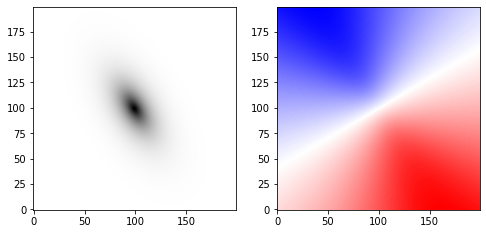

In [11]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].imshow(ds.imap_img, origin='lower', cmap='binary')

axes[1].imshow(ds.vmap_img, origin='lower', cmap='bwr')

plt.show()

In [12]:
logprob.log_likelihood.dsim.evaluateTheoryModel(pars.dynamic_fid)
%time img1, noise1 = ds.data_generators[0].cpp_stack(ds._data, ds.lambdas, force_noise_free=True)

CPU times: user 817 ms, sys: 50 µs, total: 817 ms
Wall time: 816 ms


In [19]:
ds._data.shape

(1770, 200, 200)

In [11]:
### wrap data for cpp dispersion
_theory_data = ds._data
_lambdas = ds.lambdas
if USE_REAL_BANDPASS:
    _bandpasses = ds.data_generators[0].bandpass(_lambdas)
else:
    _bandpasses = np.ones(_lambdas.shape)
Nlam = _theory_data.shape[0]
print(f"""Data Dimension:
theory cube {_theory_data.shape}
wavelength grid {_lambdas.shape}
bandpasses {_bandpasses.shape}""")
start_time = time.time()

%time theory_data = m.DBVec(_theory_data.flatten())
%time lambdas = m.DBVec(_lambdas.flatten())
%time bandpasses = m.DBVec(_bandpasses.flatten())
%time dispersed_data = m.DBVec(np.zeros([pars.meta['observations']['obs_1']['Ny'], \
                                   pars.meta['observations']['obs_1']['Nx']]).flatten())
print("----- %s seconds -----" % (time.time() - start_time))
stat = m.set_pars(
    pars.meta['model_dimension']['Nx'],
    pars.meta['model_dimension']['Ny'],
    Nlam,
    pars.meta['model_dimension']['scale'],
    pars.meta['observations']['obs_1']['Nx'],
    pars.meta['observations']['obs_1']['Ny'],
    pars.meta['observations']['obs_1']['pixel_scale'], 
    pars.meta['observations']['obs_1']['R_spec'],
    pars.meta['observations']['obs_1']['disp_ang'],
    pars.meta['observations']['obs_1']['offset'], 
    pars.meta['observations']['obs_1']['diameter'],
    pars.meta['observations']['obs_1']['exp_time'],
    pars.meta['observations']['obs_1']['gain']
)
stat = m.print_Pars()

Data Dimension:
theory cube (1770, 200, 200)
wavelength grid (1770, 2)
bandpasses (1770, 2)
CPU times: user 2.67 s, sys: 232 ms, total: 2.9 s
Wall time: 2.88 s
CPU times: user 151 µs, sys: 19 µs, total: 170 µs
Wall time: 163 µs
CPU times: user 135 µs, sys: 18 µs, total: 153 µs
Wall time: 146 µs
CPU times: user 74 µs, sys: 9 µs, total: 83 µs
Wall time: 76.5 µs
----- 2.882802724838257 seconds -----
Print Pars object:
	 - theory_cube_Nx = 200
	 - theory_cube_Ny = 200
	 - theory_cube_Nlam = 1770
	 - theory_cube_scale = 0.016
	 - observed_image_Nx = 38
	 - observed_image_Ny = 38
	 - observed_image_scale = 0.065
	 - R_spec = 215
	 - disper_angle = 0
	 - offset = -550.963
	 - diameter [cm] = 240
	 - exptime [sec] = 5000
	 - gain = 1


In [12]:
_theory_data.shape

(1770, 200, 200)

In [10]:
%time stat = m.stack(theory_data, lambdas, bandpasses, dispersed_data)

CPU times: user 288 ms, sys: 238 µs, total: 288 ms
Wall time: 284 ms


In [15]:
# photons / (s cm2) (bandpass applied)
test = gs.Image(
    np.array(dispersed_data).reshape([pars.meta['observations']['obs_1']['Ny'], 
                                   pars.meta['observations']['obs_1']['Nx']]),
    dtype=np.float64, scale=pars.meta['observations']['obs_1']['pixel_scale']
)

In [9]:
pars.meta['observations']['obs_1']

{'inst_name': 'HST/WFC3',
 'type': 'grism',
 'bandpass': '../data/Bandpass/HST/WFC3_IR_G141_1st.dat',
 'Nx': 38,
 'Ny': 38,
 'pixel_scale': 0.065,
 'R_spec': 215,
 'psf_type': 'none',
 'psf_kwargs': {'fwhm': 0.13},
 'disp_ang': 0.0,
 'offset': -550.96322,
 'diameter': 240,
 'exp_time': 5000.0,
 'gain': 1.0,
 'noise': {'type': 'ccd',
  'sky_level': 0.1,
  'read_noise': 20,
  'apply_to_data': False}}

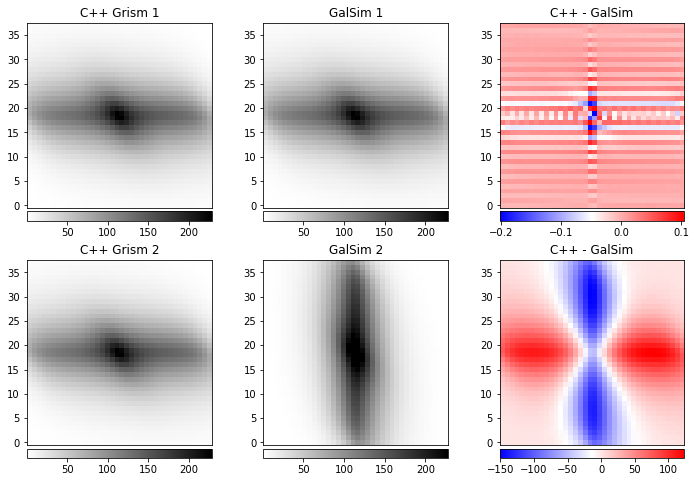

In [18]:
fig, axes = plt.subplots(2,3,figsize=(12,8))

cb1 = axes[0,0].imshow(#test.array,
                     #test + covs_fid[0],
                     data_fast[0],
                     origin='lower', cmap='binary')
ad1 = make_axes_locatable(axes[0,0], )
cax1 = ad1.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb1, cax=cax1, orientation='horizontal')
axes[0,0].set_title("C++ Grism 1")
axes[0,0].set(xticks=[], )
vmin, vmax = cb1.get_clim()

cb2 = axes[0,1].imshow(
    #data_fid[0] + covs_fid[0], 
    data_fid[0],
    origin='lower', cmap='binary', vmin=vmin, vmax=vmax)
ad2 = make_axes_locatable(axes[0,1], )
cax2 = ad2.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb2, cax=cax2, orientation='horizontal')
axes[0,1].set_title("GalSim 1")
axes[0,1].set(xticks=[], )

#diff_map = test.array - data_fid[0]
diff_map = data_fast[0] - data_fid[0]
cb3 = axes[0,2].imshow(diff_map , origin='lower', cmap='bwr', 
                     #vmin=-10, vmax=10,
                    )
ad3 = make_axes_locatable(axes[0,2], )
cax3 = ad3.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb3, cax=cax3, orientation='horizontal')
axes[0,2].set_title('C++ - GalSim')
axes[0,2].set(xticks=[], )

cb1 = axes[1,0].imshow(#test.array,
                     #test + covs_fid[0],
                     data_fast[1],
                     origin='lower', cmap='binary')
ad1 = make_axes_locatable(axes[1,0], )
cax1 = ad1.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb1, cax=cax1, orientation='horizontal')
axes[1,0].set_title("C++ Grism 2")
axes[1,0].set(xticks=[], )
vmin, vmax = cb1.get_clim()

cb2 = axes[1,1].imshow(
    #data_fid[0] + covs_fid[0], 
    data_fid[1],
    origin='lower', cmap='binary', vmin=vmin, vmax=vmax)
ad2 = make_axes_locatable(axes[1,1], )
cax2 = ad2.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb2, cax=cax2, orientation='horizontal')
axes[1,1].set_title("GalSim 2")
axes[1,1].set(xticks=[], )

#diff_map = test.array - data_fid[0]
diff_map = data_fast[1] - data_fid[1]
cb3 = axes[1,2].imshow(diff_map , origin='lower', cmap='bwr', 
                     #vmin=-10, vmax=10,
                    )
ad3 = make_axes_locatable(axes[1,2], )
cax3 = ad3.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb3, cax=cax3, orientation='horizontal')
axes[1,2].set_title('C++ - GalSim')
axes[1,2].set(xticks=[], )

plt.show()

In [18]:
np.sum((diff_map**2/covs_fid[0]**2)) / 38**2

0.00028507924543107237

In [12]:
%time a = gs.Image(img1)
%time gal = gs.InterpolatedImage(a, scale=pars.meta['observations']['obs_1']['pixel_scale'])

CPU times: user 78 µs, sys: 4 µs, total: 82 µs
Wall time: 89.6 µs
CPU times: user 0 ns, sys: 1.73 ms, total: 1.73 ms
Wall time: 1.53 ms


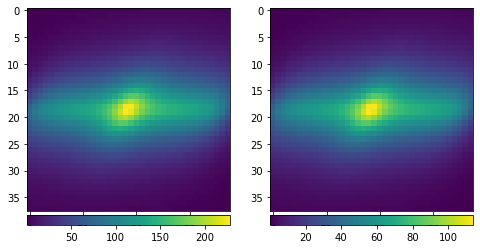

In [17]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

cb1 = axes[0].imshow(a.array)
ad = make_axes_locatable(axes[0])
cax = ad.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb1, cax=cax, orientation='horizontal')

b = a * 0.5
cb1 = axes[1].imshow(b.array)
ad = make_axes_locatable(axes[1])
cax = ad.append_axes("bottom", size="5%", pad="2%")
plt.colorbar(cb1, cax=cax, orientation='horizontal')

In [20]:
a = np.array([[1,2,3], [4,5,6]])
print(np.mean(a))

3.5


## TODO

- [ ] tune `GalSim` precision parameters `GSParams` objest (see [here](https://galsim-developers.github.io/GalSim/_build/html/gsparams.html?highlight=gsparam)) and compare between C++ implementation and python `GalSim` routines. We need really high precision to derive precise shear measurement.
- [ ] It would be good to merge with Spencer's repo oneday. 
- [ ] Move cpp stack into a class object, rather than a stand-alone function